In [1]:
import test_static as ts
from jax import jit, jacfwd, jacrev
import jax.random as jr
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as np
from typing import NamedTuple
from jaxtyping import Float32
from itertools import count
from tensorflow_probability.substrates.jax.distributions import MultivariateNormalFullCovariance as MVN
import tensorflow_probability.substrates.jax.distributions as tfd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

In [19]:
f = lambda x : jnp.dot(x, x)

dx = 2
Nprt = 100
mu = jnp.array([0.01, 0.01])
cov = 10 * jnp.eye(2)
Q = 0.01 * jnp.eye(1)
y0 = 1.0
hessian = jit(jacfwd(jacrev(f)))
hess = hessian(mu)
Delta = 0.9 * cov #utils.sdp_opt(2, Nprt , 1, cov, cov, hess, 10, 0.01)
model = ts.AugmentedJointApproximation(Nprt, f, dx, 1, mu, cov, Q, Delta)
# # posterior = model.return_posterior(1.0)
keys = map(jr.PRNGKey, count(11))
posterior = model.return_posterior([y0], keys)[0]
grads = model.return_posterior([y0], keys)[1]
# print(posterior.weights.shape)
# print(posterior.covs)

In [20]:
Jn = grads[10]
Sy = Q + Jn.T @ Delta @ Jn
Omy = jnp.linalg.inv(Sy)
Delta @ Jn @ Omy

Array([[0.17828521],
       [0.2389985 ]], dtype=float32)

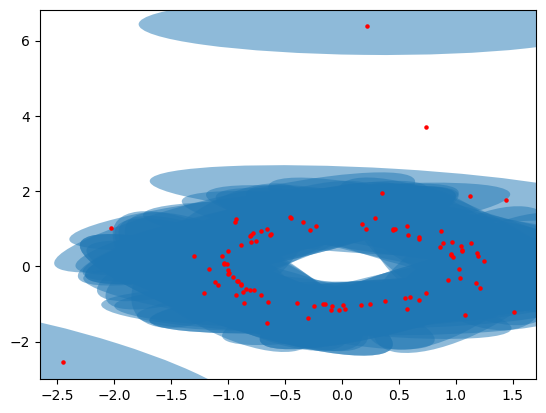

In [21]:
ax = plt.gca()
p = posterior.weights
p = np.asarray(p).astype('float64')
p = p / np.sum(p)
idx = np.random.choice(Nprt, 40, p=p)
for i in idx:
    ts.plot_cov_ellipse(np.sqrt(p[i]) * posterior.covs[i], posterior.means[i], nstd=2, ax=ax, alpha=0.5)
plt.scatter(posterior.means[:, 0], posterior.means[:, 1], s=5, c='r')
plt.show()